# Neural Network from scratch

This is a work I did to understand what is behind the neural network mathematically.
It is mostly based on this [youtube video](https://www.youtube.com/watch?v=w8yWXqWQYmU) from Samson Zhang and the [kaggle notebook](https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras/notebook) the dataset is also available there. Some modifications to the code where done in agreement to the comments in the discussions part (Chadocan especially). 

📝 Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

📝 Import the csv file

In [2]:
data = pd.read_csv('../raw_data/train.csv')

📝 Look at the data

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


📝 I drop the row with the label and visualize the data

In [4]:
X_values = data.drop(labels = ['label'], axis = 1)

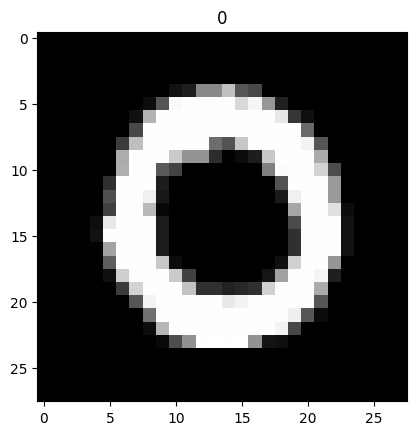

In [5]:
# we take row 1 and reshape it to an image
plt.imshow(X_values.iloc[[1]].to_numpy().reshape((28,28)),cmap = "gray"); #.to_numpy() convert dataframe to numpy array
plt.title(data['label'][1]);

📝 Create a list of random numbers

In [6]:
randomlist = []
b=4
nb = 5*b
for i in range(0,nb):
    n = np.random.randint(1,30)
    randomlist.append(n)
#randomlist

In [7]:
def rand_image(set_list):
    fig, axs = plt.subplots(nrows=int(nb/5), ncols=int(5), figsize=(15, 6))
    fig.subplots_adjust(hspace = 0.5)
    for i, ax in zip(set_list, axs.flat):
        ax.imshow(X_values.iloc[[i]].to_numpy().reshape((28,28)),cmap = "gray")
        ax.set_title(data['label'][i])
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
    return plt.show()

📝 Visualize the list

This is the list of random numbers:' [29, 9, 9, 6, 3, 19, 11, 18, 7, 6, 22, 26, 4, 7, 5, 28, 3, 11, 24, 25]


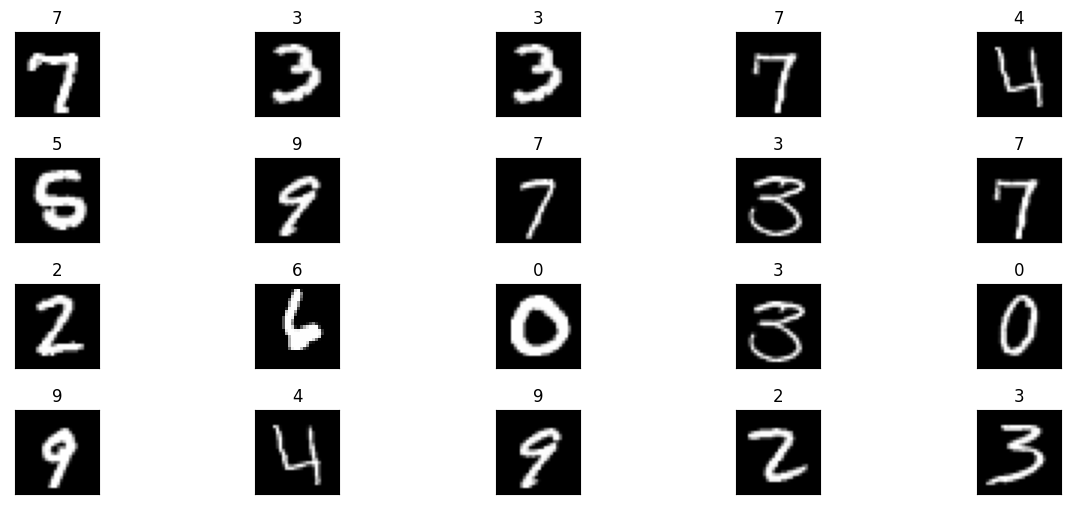

In [8]:
print(f"This is the list of random numbers:' {randomlist}")
image = rand_image(randomlist)

📝 Let start the neural network writting some functions

In [9]:
# Function to obtain the train and test data
def train_test():
    m, n = data.shape
    # split manually the data in train and test sets
    data_test = data[0:1000].T
    Y_test = data_test[0]
    X_test = data_test[1:n]
    X_test = X_test / 255.
    
    data_train = data[1000:m].T
    Y_train = data_train[0]
    X_train = data_train[1:n]
    X_train = X_train / 255.
    return X_train, Y_train, X_test, Y_test

In [10]:
# Generate random values as init parameters
def init_param(X, nb_neuron, output_neuron):
    global size, m
    size,m = X.shape
    W1 = np.random.rand(nb_neuron, size) -0.5 # 10 neurons taking from 784 inputs # values between 0.5 and -0.5
    b1 = np.random.rand(nb_neuron, 1) - 0.5
    W2 = np.random.rand(output_neuron, nb_neuron) -0.5 # 10 neurons from dense layer taking from 10 neurons from input layer
    b2 = np.random.rand(output_neuron, 1) -0.5
    return W1, b1, W2, b2

# activation function ReLu x if x>0, 0 if x<=0
def ReLU(Z):
    return np.maximum(Z,0)

# Activation function for output
def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

## Forward propagation insert the values from X and apply weights
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1  # Connection to input layer equivalent to np.dot(X, W1) equivalent to (dot product inputs*weights) + biais 
    A1 = ReLU(Z1)    # Activation function
    Z2 = W2.dot(A1) + b2    # Connection to Dense Layer. Take the activated output of input layer and put into 1st dense layer
    A2 = softmax(Z2)   
    return Z1, A1, Z2, A2
# np.dot explained
# a = np.array([[1, 0], [0, 1]])
# b = np.array([[4, 1], [2, 2]])
# #np.dot(a, b) equivalent to a.dot(b)
# [1*4 + 0*2];
# [1*1+0*2];
# [0*4+1*2]
# [0*1+1*2];


# One hot encode Y for back propagation
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))   ## array of zeros with a tuple of sizes: Y.size how many example there are, (Y.max() + 1) output classes 10 values
    one_hot_Y[np.arange(Y.size), Y] = 1  ### array of numbers from 0 through m
    one_hot_Y = one_hot_Y.T  ### Transpose that each column is an example
    return one_hot_Y

## derivative of ReLU
def deriv_ReLU(Z):
    return Z>0

# back propagation
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y) ## one hot encode target [0,.., 9] into 1 and 0
    dZ2 = 2*(A2 - one_hot_Y)  #derivative of Z2 
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, 1)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, 1)
    return dW1, db1, dW2, db2
    

# alpha learning rate, b biases, W weight, db 
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 -alpha * dW1
    b1 = b1 -alpha *np.reshape(db1, (10,1))
    W2 = W2 -alpha * dW2
    b2 = b2 -alpha *np.reshape(db2, (10,1))
    return W1, b1, W2, b2

In [11]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y)/ Y.size

# The full neural network. It consists of one input layer, a hidden layer of nb_neuron and an output layer
def gradient_descent(X, Y, nb_neuron, output_neuron,iterations, alpha):
    W1, b1, W2, b2 = init_param(X, nb_neuron, output_neuron)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i+1) % int(iterations/10) == 0:
            print(f"Iteration: {i+1} / {iterations}")
            print(get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

📝 The neural network work at work

In [12]:
data = np.array(data)
np.random.shuffle(data) # shuffle before splitting into test and training sets
X_train, Y_train, X_test, Y_test = train_test()

In [13]:
input_n = 784  ## depends on the photo size
output = 10   ## 10 numbers [0,.. 9]
neuron = 10  ## nb of neurons
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, output, neuron, 500, 0.20)

Iteration: 50 / 500
[7 0 5 ... 2 9 5] [7 0 5 ... 2 9 5]
0.7126341463414634
Iteration: 100 / 500
[7 0 5 ... 2 9 5] [7 0 5 ... 2 9 5]
0.8191951219512195
Iteration: 150 / 500
[7 0 5 ... 2 9 5] [7 0 5 ... 2 9 5]
0.852609756097561
Iteration: 200 / 500
[7 0 5 ... 2 9 5] [7 0 5 ... 2 9 5]
0.8600487804878049
Iteration: 250 / 500
[7 0 5 ... 2 9 5] [7 0 5 ... 2 9 5]
0.8767073170731707
Iteration: 300 / 500
[7 0 5 ... 2 9 5] [7 0 5 ... 2 9 5]
0.894609756097561
Iteration: 350 / 500
[7 0 5 ... 2 9 5] [7 0 5 ... 2 9 5]
0.8985121951219512
Iteration: 400 / 500
[7 0 5 ... 2 9 5] [7 0 5 ... 2 9 5]
0.9026585365853659
Iteration: 450 / 500
[7 0 5 ... 2 9 5] [7 0 5 ... 2 9 5]
0.8671463414634146
Iteration: 500 / 500
[7 0 5 ... 2 9 5] [7 0 5 ... 2 9 5]
0.908390243902439


In [14]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X) 
    predictions = get_predictions(A2) # For the predictions, we only need the values from the output layer A2
    return predictions

def test_prediction(index,X, Y, W1, b1, W2, b2):
    current_image = X[:, index, None]
    prediction = make_predictions(X[:, index, None], W1, b1, W2, b2)
    label = Y[index]
    return current_image, prediction, label

📝 We obtain an accuracy of 0.85

In [15]:
test_predict = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predict, Y_test)

[0 5 8 7 7 1 9 7 7 1 1 8 9 5 7 9 5 2 5 9 3 7 6 9 4 2 1 0 0 5 5 5 5 5 2 6 9
 1 3 2 6 5 4 8 1 5 9 7 7 0 9 3 1 6 6 5 5 5 7 7 3 8 5 0 0 0 2 1 5 9 0 2 4 1
 5 3 8 9 0 4 1 5 3 0 9 7 1 4 3 0 0 2 1 1 2 5 8 9 6 0 4 8 6 7 8 7 3 6 4 0 4
 2 5 5 0 1 7 6 0 6 2 6 2 2 0 6 3 5 3 8 7 4 5 6 8 5 2 1 2 8 5 8 8 4 4 8 0 3
 7 6 9 8 0 7 3 3 1 3 6 5 7 8 7 8 1 3 7 6 2 0 3 1 0 2 3 0 5 6 0 4 6 1 4 2 7
 0 0 0 9 8 6 7 7 8 7 0 9 0 1 2 2 2 9 5 6 8 4 7 1 8 2 1 7 4 1 8 1 0 9 8 9 4
 1 8 0 8 1 1 2 8 8 2 3 4 4 3 4 4 0 4 9 1 6 9 2 9 6 8 6 8 1 2 5 9 1 8 2 9 8
 1 1 9 1 6 2 2 1 0 3 5 8 0 8 3 9 0 0 7 1 0 5 7 4 0 5 7 3 3 5 3 1 1 5 1 4 0
 3 7 6 8 3 6 5 4 0 0 6 6 2 4 6 3 0 7 4 1 8 2 8 2 1 8 7 4 3 1 5 4 8 7 5 7 2
 4 0 8 3 1 1 4 4 5 3 1 0 7 2 3 1 5 2 0 4 8 8 8 5 5 5 9 2 1 4 6 2 9 8 0 7 0
 2 7 8 8 1 5 9 8 8 9 9 9 5 6 2 8 1 7 7 5 8 1 0 1 1 7 1 4 8 0 5 1 2 4 1 8 8
 5 8 4 2 1 0 6 0 0 3 7 7 8 4 7 3 2 0 3 2 3 5 5 7 7 3 4 8 8 2 6 7 9 8 3 6 2
 9 2 7 7 7 2 9 5 5 8 4 0 0 0 4 1 5 8 3 7 3 9 3 6 8 6 6 1 4 3 6 1 1 9 0 0 0
 7 5 6 1 3 6 3 4 5 0 7 2 

0.918

In [16]:
def image_pred(list_rand):
    fig, axs = plt.subplots(nrows=int(nb/5), ncols=int(5), figsize=(15, 6))
    fig.subplots_adjust(hspace = 1.5)
    my_dict = {0:"zero", 1:'one', 2:'two', 3:'three', 4: 'four', 5: 'five', 6:'six', 7:'seven', 8: 'eight', 9: 'nine'}
    for num, ax in zip(list_rand, axs.flat):
        ax.imshow(test_prediction(num, X_test, Y_test, W1, b1, W2, b2)[0].reshape((28, 28)) * 255, cmap=plt.cm.gray_r)
        ax.set_title(f"Label: {test_prediction(num, X_test, Y_test, W1, b1, W2, b2)[2]}, \n Your number is: {np.vectorize(my_dict.get)(test_prediction(num, X_test, Y_test, W1, b1, W2, b2)[1])}")
    plt.show()

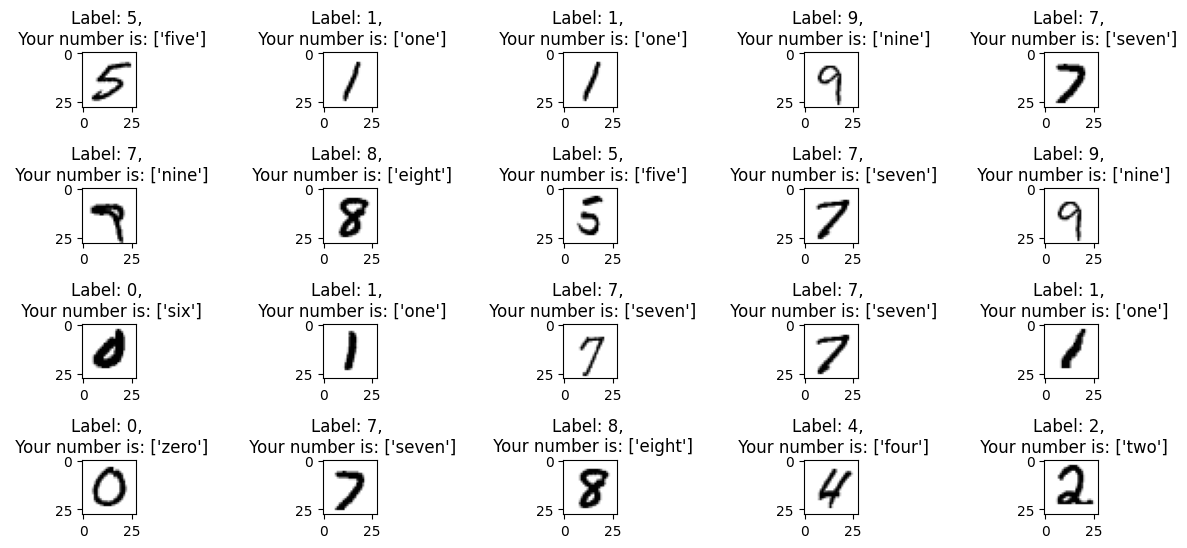

In [17]:
image_pred(randomlist)